<a href="https://colab.research.google.com/github/BaghasWahyu/Cryptocurrency-Predicition-App/blob/main/Crypto_price_prediction_using_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# from google.colab import drive
# drive.flush_and_unmount()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [5]:
crypto_name_list = []
crypto_market_cap_list = []
crypto_price_list = []
crypto_circulating_supply_list = []
crypro_symbol_list = []

In [6]:
df = pd.DataFrame()

In [7]:
def scrape(date):
  URL = 'https://coinmarketcap.com/historical/'+date
  webpage = requests.get(URL)
  soup = BeautifulSoup(webpage.text, 'html.parser')
  tr = soup.find_all('tr', attrs={'class':'cmc-table-row'})
  count = 0
  for row in tr:
    if count == 10:
      break;
    count = count + 1
    name_column = row.find('td', attrs={'class': 'cmc-table__cell cmc-table__cell--sticky cmc-table__cell--sortable cmc-table__cell--left cmc-table__cell--sort-by__name'})
    crypto_name = name_column.find('a', attrs={'class':'cmc-table__column-name--name cmc-link'}).text.strip()
    coin_market_cap = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__market-cap'}).text.strip()
    crypto_price = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__price'}).text.strip()
    crypto_circulating_supply_symbol = row.find('td', attrs={'class':'cmc-table__cell cmc-table__cell--sortable cmc-table__cell--right cmc-table__cell--sort-by__circulating-supply'}).text.strip()
    crypto_circulating_supply = crypto_circulating_supply_symbol.split(' ')[0]
    crypto_symbol = crypto_circulating_supply_symbol.split(' ')[1]

    crypto_name_list.append(crypto_name)
    crypto_market_cap_list.append(coin_market_cap)
    crypto_price_list.append(crypto_price)
    crypto_circulating_supply_list.append(crypto_circulating_supply)
    crypro_symbol_list.append(crypto_symbol)

In [8]:
from datetime import datetime

tanggal = '2022-12-31' #@param {type:"date"}
tanggal = tanggal.replace("-","")


In [9]:
print(tanggal)

20221231


In [10]:
scrape(date = f'{tanggal}/')

In [11]:
df['Name'] =  crypto_name_list
df['Market Capitalization'] = crypto_market_cap_list
df['Price'] = crypto_price_list
df['Circulating Supply'] = crypto_circulating_supply_list
df['Symbol'] = crypro_symbol_list

In [12]:
df

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB
5,XRP,"$17,113,207,466.28",$0.3399,"50,343,500,506",XRP
6,Binance USD,"$16,695,767,093.61",$1.0002,"16,692,004,510",BUSD
7,Dogecoin,"$9,325,956,852.39",$0.07029,"132,670,764,300",DOGE
8,Cardano,"$8,505,385,897.18",$0.2465,"34,509,377,667",ADA
9,Polygon,"$6,625,126,687.82",$0.7585,"8,734,317,475",MATIC


In [13]:
list_crypto = df[:5]

In [14]:
list_crypto

,Name,Market Capitalization,Price,Circulating Supply,Symbol
0,Bitcoin,"$318,516,317,872.24","$16,547.50","19,248,612",BTC
1,Ethereum,"$146,453,523,490.14","$1,196.77","122,373,866",ETH
2,Tether,"$66,242,103,757.59",$0.9997,"66,263,713,431",USDT
3,USD Coin,"$44,540,806,740.10",$1.0000,"44,539,532,929",USDC
4,BNB,"$39,407,173,515.71",$246.35,"159,964,697",BNB


In [15]:
nama_crypto = list_crypto['Name']
symbol_crypto = list_crypto['Symbol']

In [16]:
nama_crypto

0     Bitcoin
1    Ethereum
2      Tether
3    USD Coin
4         BNB
Name: Name, dtype: object

In [17]:
symbol_crypto

0     BTC
1     ETH
2    USDT
3    USDC
4     BNB
Name: Symbol, dtype: object

In [18]:
print(type(symbol_crypto))

<class 'pandas.core.series.Series'>


In [19]:
symbolCrypto = []

for i in symbol_crypto:
  symbolCrypto.append(i)

In [20]:
symbolCrypto

['BTC', 'ETH', 'USDT', 'USDC', 'BNB']

In [21]:
!pip install cryptocmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 823.5 kB/s eta 0:00:00


In [22]:
from datetime import datetime

startdate = "2019-01-01" #@param {type:"date"}
startdate = datetime.strptime(startdate, '%Y-%m-%d').date()
startdate = startdate.strftime("%d-%m-%Y")

enddate = "2022-12-31" #@param {type:"date"}
enddate = datetime.strptime(enddate, '%Y-%m-%d').date()
enddate = enddate.strftime("%d-%m-%Y")

In [93]:
#Pilih Crypto
import ipywidgets as widgets

crypto = widgets.Dropdown(options =symbolCrypto)
output = widgets.Output()
def select(change):
  output.clear_output()
  if(change.new == symbolCrypto[0]):
    with output:
      display(symbolCrypto[0])
  elif(change.new == symbolCrypto[1]):
    with output:
      display(symbolCrypto[1])
  elif(change.new == symbolCrypto[2]):
    with output:
      display(symbolCrypto[2])
  elif(change.new == symbolCrypto[3]):
    with output:
      display(symbolCrypto[3])
  elif(change.new == symbolCrypto[4]):
    with output:
      display(symbolCrypto[4])
  else:
    with output:
      display("Error: option not found")

crypto.observe(select, names="value")
display(crypto)
display(output)

Dropdown(options=('BTC', 'ETH', 'USDT', 'USDC', 'BNB'), value='BTC')

Output()

In [94]:
crypto = crypto.value

In [95]:
from cryptocmd import CmcScraper

scraper = CmcScraper(crypto, startdate, enddate)
df = scraper.get_dataframe()

In [96]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2022-12-31,245.788685,247.583618,245.108252,246.349190,3.075519e+08,3.940717e+10
1,2022-12-30,246.458002,246.497238,243.127468,245.779223,3.423008e+08,3.931604e+10
2,2022-12-29,244.171413,246.600993,243.579910,246.479725,3.453125e+08,3.942815e+10
3,2022-12-28,246.607114,246.840041,242.109276,244.141926,4.146990e+08,3.905422e+10
4,2022-12-27,244.202658,247.679686,242.562180,246.596686,3.913423e+08,3.944695e+10


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [98]:
df['Open'] = df['Open'].apply(lambda x:round(x,2))
df['High'] = df['High'].apply(lambda x:round(x,2))
df['Low'] = df['Low'].apply(lambda x:round(x,2))
df['Close'] = df['Close'].apply(lambda x:round(x,2))
df['Volume'] = df['Volume'].apply(lambda x:round(x,0))
df['Market Cap'] = df['Market Cap'].apply(lambda x:round(x,0))

In [99]:
df = df[::-1]
df = df.reset_index()

In [100]:
df = df.drop(columns=['index'])

In [101]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-01-01,6.19,6.19,5.89,6.08,23891162.0,7.946415e+08
1,2019-01-02,6.09,6.21,5.95,6.19,30308610.0,8.094664e+08
2,2019-01-03,6.17,6.18,5.90,5.90,22821639.0,7.721782e+08
3,2019-01-04,5.90,6.07,5.86,6.07,29311136.0,7.933158e+08
4,2019-01-05,6.06,6.20,6.03,6.07,30340637.0,7.933688e+08
...,...,...,...,...,...,...,...
1456,2022-12-27,244.20,247.68,242.56,246.60,391342277.0,3.944695e+10
1457,2022-12-28,246.61,246.84,242.11,244.14,414698978.0,3.905422e+10
1458,2022-12-29,244.17,246.60,243.58,246.48,345312528.0,3.942815e+10
1459,2022-12-30,246.46,246.50,243.13,245.78,342300809.0,3.931604e+10


In [102]:
df.to_excel(f"{crypto}_data_historis.xlsx")

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1461 non-null   datetime64[ns]
 1   Open        1461 non-null   float64       
 2   High        1461 non-null   float64       
 3   Low         1461 non-null   float64       
 4   Close       1461 non-null   float64       
 5   Volume      1461 non-null   float64       
 6   Market Cap  1461 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 80.0 KB


In [104]:
#Mengubah kolom Date menjadi index
df = df[['Date','Open','High','Low','Close']] # Extracting required columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', drop=True, inplace=True) # Setting date column as index
df

,Open,High,Low,Close
Date,,,,
2019-01-01,6.19,6.19,5.89,6.08
2019-01-02,6.09,6.21,5.95,6.19
2019-01-03,6.17,6.18,5.90,5.90
2019-01-04,5.90,6.07,5.86,6.07
2019-01-05,6.06,6.20,6.03,6.07
...,...,...,...,...
2022-12-27,244.20,247.68,242.56,246.60
2022-12-28,246.61,246.84,242.11,244.14
2022-12-29,244.17,246.60,243.58,246.48


In [105]:
crypto_data = df

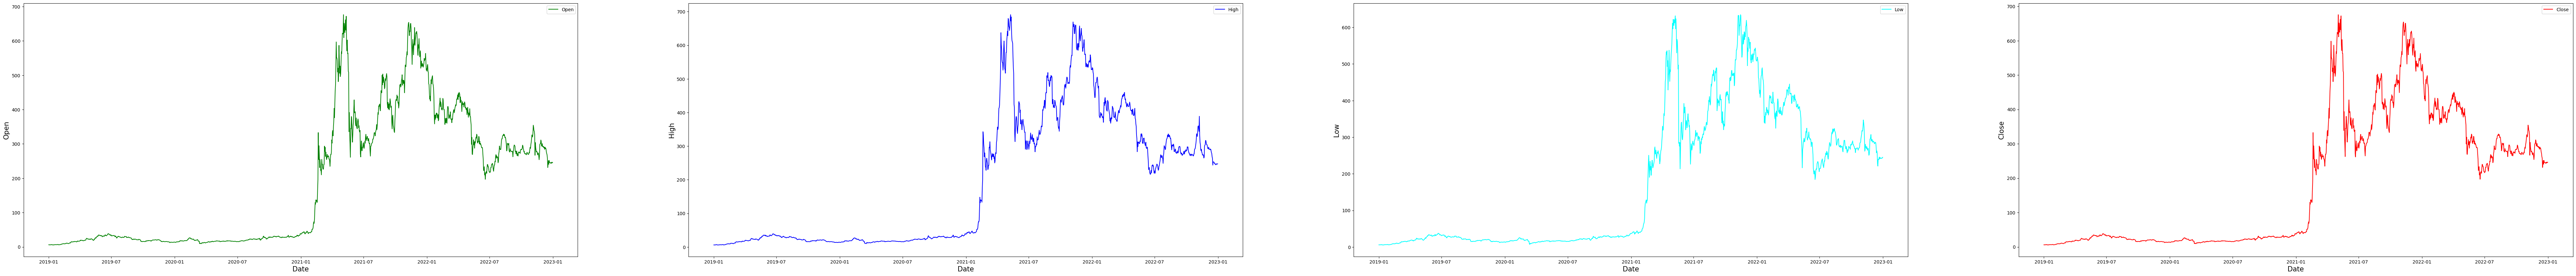

In [106]:
fig, ax = plt.subplots(1,4,figsize=(100,10))

ax[0].plot(crypto_data['Open'], label='Open', color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Open',size=15)
ax[0].legend()

ax[1].plot(crypto_data['High'], label='High', color='blue')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('High',size=15)
ax[1].legend()

ax[2].plot(crypto_data['Low'], label='Low', color='cyan')
ax[2].set_xlabel('Date',size=15)
ax[2].set_ylabel('Low',size=15)
ax[2].legend()

ax[3].plot(crypto_data['Close'], label='Close' ,color='red')
ax[3].set_xlabel('Date',size=15)
ax[3].set_ylabel('Close',size=15)
ax[3].legend()

fig.show()

# Data Pre-Processing

In [107]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler(feature_range=(0, 1))
crypto_data[crypto_data.columns] = MMS.fit_transform(crypto_data)

In [108]:
crypto_data.shape

(1461, 4)

In [109]:
#Pembagian data training dan data testing sebesar 90% dan 10% masing-masing
training_size = round(len(crypto_data) * 0.90)
training_size

1315

In [110]:
train_data = crypto_data[:training_size]
test_data  = crypto_data[training_size:]

train_data.shape, test_data.shape

((1315, 4), (146, 4))

In [111]:
test_data

,Open,High,Low,Close
Date,,,,
2022-08-08,0.473164,0.477246,0.504006,0.476384
2022-08-09,0.475982,0.469873,0.489635,0.476549
2022-08-10,0.476012,0.482210,0.491082,0.481861
2022-08-11,0.481379,0.479027,0.503640,0.474892
2022-08-12,0.474386,0.469406,0.497218,0.480429
...,...,...,...,...
2022-12-27,0.355756,0.352854,0.376864,0.359687
2022-12-28,0.359349,0.351627,0.376149,0.356016
2022-12-29,0.355712,0.351277,0.378485,0.359508


In [112]:
# Fungsi untuk membuat rangkaian data untuk training dan testing
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(10, len(dataset)): # memilih 10 baris dalam waktu bersamaan
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [113]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [114]:
print(test_seq.shape, test_label.shape)

(136, 10, 4) (136, 4)


In [115]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1305, 10, 4), (1305, 4), (136, 10, 4), (136, 4))

In [116]:
train_seq.shape[1], train_seq.shape[2]

(10, 4)

# Creating LSTM model

In [117]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint

In [118]:
# Struktur jaringan LSTM
def LSTM_model():
  model = Sequential()
  model.add(LSTM(units=100, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100, return_sequences=True,))
  model.add(Dropout(0.2))

  model.add(LSTM(units=100))
  model.add(Dropout(0.2))

  model.add(Dense(4))

  return model

In [119]:
  model = LSTM_model()
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
  model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 100)           42000     
                                                                 
 dropout_3 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 100)           80400     
                                                                 
 dropout_4 (Dropout)         (None, 10, 100)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                

In [251]:
#Pilih epoch
epoch="100" # @param [25, 50, 75, 100]
epoch = int(epoch)

In [252]:
filepath = f'{crypto}_epoch_{epoch}_model'

In [253]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

model.fit(train_seq, train_label, batch_size=32, epochs=epoch, validation_data=(test_seq, test_label), verbose=1, callbacks=callbacks)

Epoch 1/100
41/41 [==============================] - ETA: 0s - loss: 9.4614e-04 - mean_absolute_error: 0.0209
Epoch 1: val_loss improved from inf to 0.00036, saving model to BNB_epoch_100_model


41/41 [==============================] - 16s 412ms/step - loss: 9.4614e-04 - mean_absolute_error: 0.0209 - val_loss: 3.6119e-04 - val_mean_absolute_error: 0.0159
Epoch 2/100
41/41 [==============================] - ETA: 0s - loss: 7.4262e-04 - mean_absolute_error: 0.0187
Epoch 2: val_loss improved from 0.00036 to 0.00017, saving model to BNB_epoch_100_model


41/41 [==============================] - 14s 351ms/step - loss: 7.4262e-04 - mean_absolute_error: 0.0187 - val_loss: 1.7416e-04 - val_mean_absolute_error: 0.0094
Epoch 3/100
41/41 [==============================] - ETA: 0s - loss: 7.8531e-04 - mean_absolute_error: 0.0190
Epoch 3: val_loss did not improve from 0.00017
41/41 [==============================] - 1s 32ms/step - loss: 7.8531e-04 - mean_absolute_error: 0.0190 - val_loss: 3.1153e-04 - val_mean_absolute_error: 0.0142
Epoch 4/100
41/41 [==============================] - ETA: 0s - loss: 8.8213e-04 - mean_absolute_error: 0.0208
Epoch 4: val_loss improved from 0.00017 to 0.00016, saving model to BNB_epoch_100_model


41/41 [==============================] - 14s 353ms/step - loss: 8.8213e-04 - mean_absolute_error: 0.0208 - val_loss: 1.6087e-04 - val_mean_absolute_error: 0.0088
Epoch 5/100
40/41 [============================>.] - ETA: 0s - loss: 7.2839e-04 - mean_absolute_error: 0.0190
Epoch 5: val_loss improved from 0.00016 to 0.00016, saving model to BNB_epoch_100_model


41/41 [==============================] - 17s 419ms/step - loss: 7.3194e-04 - mean_absolute_error: 0.0190 - val_loss: 1.6006e-04 - val_mean_absolute_error: 0.0088
Epoch 6/100
41/41 [==============================] - ETA: 0s - loss: 6.8209e-04 - mean_absolute_error: 0.0173
Epoch 6: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 32ms/step - loss: 6.8209e-04 - mean_absolute_error: 0.0173 - val_loss: 1.6066e-04 - val_mean_absolute_error: 0.0087
Epoch 7/100
41/41 [==============================] - ETA: 0s - loss: 8.1820e-04 - mean_absolute_error: 0.0193
Epoch 7: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 32ms/step - loss: 8.1820e-04 - mean_absolute_error: 0.0193 - val_loss: 2.4105e-04 - val_mean_absolute_error: 0.0119
Epoch 8/100
41/41 [==============================] - ETA: 0s - loss: 7.8599e-04 - mean_absolute_error: 0.0180
Epoch 8: val_loss did not improve from 0.00016
41/41 [==============================] - 1s 31m

41/41 [==============================] - 14s 351ms/step - loss: 7.6684e-04 - mean_absolute_error: 0.0186 - val_loss: 1.5075e-04 - val_mean_absolute_error: 0.0081
Epoch 24/100
41/41 [==============================] - ETA: 0s - loss: 7.5161e-04 - mean_absolute_error: 0.0187
Epoch 24: val_loss did not improve from 0.00015
41/41 [==============================] - 1s 32ms/step - loss: 7.5161e-04 - mean_absolute_error: 0.0187 - val_loss: 4.3751e-04 - val_mean_absolute_error: 0.0175
Epoch 25/100
41/41 [==============================] - ETA: 0s - loss: 8.2693e-04 - mean_absolute_error: 0.0201
Epoch 25: val_loss did not improve from 0.00015
41/41 [==============================] - 1s 32ms/step - loss: 8.2693e-04 - mean_absolute_error: 0.0201 - val_loss: 1.6372e-04 - val_mean_absolute_error: 0.0088
Epoch 26/100
41/41 [==============================] - ETA: 0s - loss: 6.8885e-04 - mean_absolute_error: 0.0176
Epoch 26: val_loss did not improve from 0.00015
41/41 [==============================] - 

41/41 [==============================] - 20s 501ms/step - loss: 7.3758e-04 - mean_absolute_error: 0.0181 - val_loss: 1.4415e-04 - val_mean_absolute_error: 0.0078
Epoch 36/100
41/41 [==============================] - ETA: 0s - loss: 8.0039e-04 - mean_absolute_error: 0.0190
Epoch 36: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 32ms/step - loss: 8.0039e-04 - mean_absolute_error: 0.0190 - val_loss: 1.6075e-04 - val_mean_absolute_error: 0.0089
Epoch 37/100
41/41 [==============================] - ETA: 0s - loss: 6.9257e-04 - mean_absolute_error: 0.0185
Epoch 37: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 32ms/step - loss: 6.9257e-04 - mean_absolute_error: 0.0185 - val_loss: 2.5997e-04 - val_mean_absolute_error: 0.0128
Epoch 38/100
41/41 [==============================] - ETA: 0s - loss: 6.9226e-04 - mean_absolute_error: 0.0177
Epoch 38: val_loss did not improve from 0.00014
41/41 [==============================] - 

41/41 [==============================] - 14s 344ms/step - loss: 7.0534e-04 - mean_absolute_error: 0.0182 - val_loss: 1.4169e-04 - val_mean_absolute_error: 0.0076
Epoch 41/100
41/41 [==============================] - ETA: 0s - loss: 6.7485e-04 - mean_absolute_error: 0.0172
Epoch 41: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 31ms/step - loss: 6.7485e-04 - mean_absolute_error: 0.0172 - val_loss: 1.6588e-04 - val_mean_absolute_error: 0.0087
Epoch 42/100
41/41 [==============================] - ETA: 0s - loss: 6.9321e-04 - mean_absolute_error: 0.0177
Epoch 42: val_loss did not improve from 0.00014
41/41 [==============================] - 1s 35ms/step - loss: 6.9321e-04 - mean_absolute_error: 0.0177 - val_loss: 3.0098e-04 - val_mean_absolute_error: 0.0136
Epoch 43/100
40/41 [============================>.] - ETA: 0s - loss: 8.1024e-04 - mean_absolute_error: 0.0194
Epoch 43: val_loss did not improve from 0.00014
41/41 [==============================] - 

In [254]:
# model = load_model(f"{crypto}_model")

In [255]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 0s 8ms/step


array([[0.4552979 , 0.45794767, 0.46274683, 0.45062292],
       [0.44108605, 0.44423923, 0.44773892, 0.43690348],
       [0.41398418, 0.41815692, 0.41900146, 0.41073644],
       [0.41638517, 0.42035598, 0.42161453, 0.41289386],
       [0.44580507, 0.4485218 , 0.4528768 , 0.44107616]], dtype=float32)

In [256]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[310.9665 , 319.66208, 296.5855 , 307.53693],
       [301.43405, 310.27277, 287.14465, 298.34338],
       [283.25574, 292.4082 , 269.06705, 280.8086 ],
       [284.86618, 293.9144 , 270.71085, 282.2543 ],
       [304.5993 , 313.20602, 290.37668, 301.13956]], dtype=float32)

In [257]:
test_inverse_predicted.shape

(136, 4)

In [258]:
test_inverse_predicted_shape_negative = -test_inverse_predicted.shape[0]

In [259]:
print(test_inverse_predicted_shape_negative)

-136


In [260]:
test_inverse = MMS.inverse_transform(test_label)

In [261]:
test_inverse[:5]

array([[306.8 , 310.19, 297.03, 298.14],
       [298.15, 298.19, 278.58, 279.72],
       [279.62, 288.91, 278.33, 283.69],
       [283.64, 303.66, 283.64, 302.06],
       [302.03, 303.82, 289.31, 300.56]])

In [262]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
mae = mean_absolute_error(test_inverse, test_inverse_predicted)
mse = mean_squared_error(test_inverse, test_inverse_predicted)
rmse = math.sqrt(mse)

In [263]:
print(f"Skor untuk model {crypto} dengan epoch {epoch} adalah MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

Skor untuk model BNB dengan epoch 100 adalah MAE: 5.876248573976403, MSE: 68.41912600334486, RMSE: 8.271585458867294


# Visualizing predicted and actual data

In [264]:
# Merging actual and predicted data for better visualization
new_data = pd.concat([df.iloc[test_inverse_predicted_shape_negative:].copy(), pd.DataFrame(test_inverse_predicted, columns=['open_predicted', 'high_predicted', 'low_predicted','close_predicted'], index=df.iloc[test_inverse_predicted_shape_negative:].index)], axis=1)

In [265]:
new_data.tail()

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-12-27,0.355756,0.352854,0.376864,0.359687,247.575211,254.644180,237.109283,245.775604
2022-12-28,0.359349,0.351627,0.376149,0.356016,249.809540,256.754883,239.460373,247.929260
2022-12-29,0.355712,0.351277,0.378485,0.359508,247.806686,254.685333,237.627060,246.013870
2022-12-30,0.359126,0.351131,0.377770,0.358464,248.802750,255.640915,238.646255,246.966385
2022-12-31,0.358127,0.352708,0.380918,0.359314,248.423599,255.209808,238.360016,246.607147


In [266]:
new_data[['Open','High','Low','Close']] = MMS.inverse_transform(new_data[['Open','High','Low','Close']])

In [267]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,306.80,310.19,297.03,298.14,310.966492,319.662079,296.585510,307.536926
2022-08-19,298.15,298.19,278.58,279.72,301.434052,310.272766,287.144653,298.343384
2022-08-20,279.62,288.91,278.33,283.69,283.255737,292.408203,269.067047,280.808594
2022-08-21,283.64,303.66,283.64,302.06,284.866180,293.914398,270.710846,282.254303
2022-08-22,302.03,303.82,289.31,300.56,304.599304,313.206024,290.376678,301.139557
...,...,...,...,...,...,...,...,...
2022-12-27,244.20,247.68,242.56,246.60,247.575211,254.644180,237.109283,245.775604
2022-12-28,246.61,246.84,242.11,244.14,249.809540,256.754883,239.460373,247.929260
2022-12-29,244.17,246.60,243.58,246.48,247.806686,254.685333,237.627060,246.013870


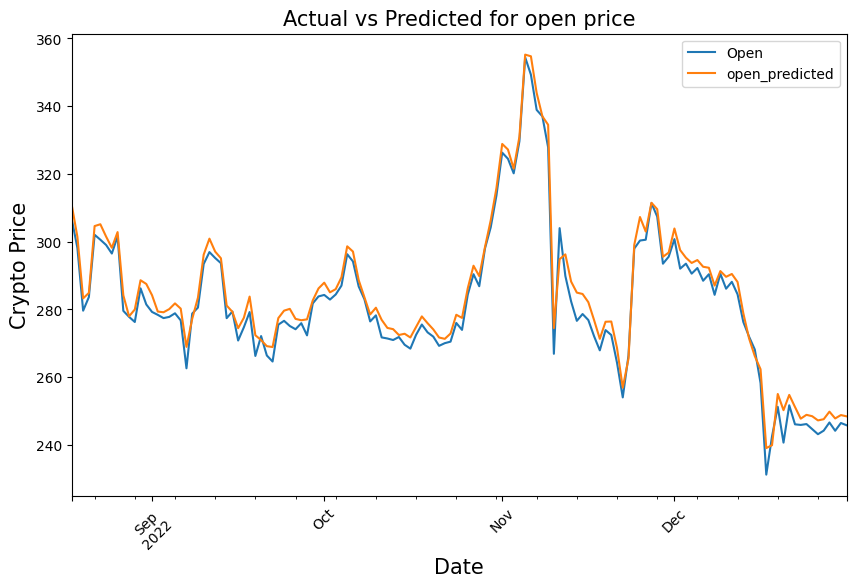

In [268]:
new_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

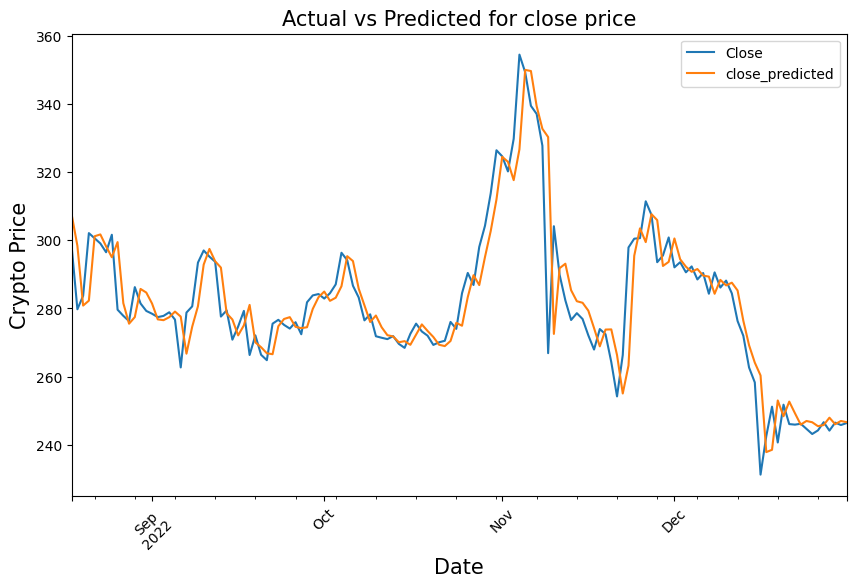

In [269]:
new_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

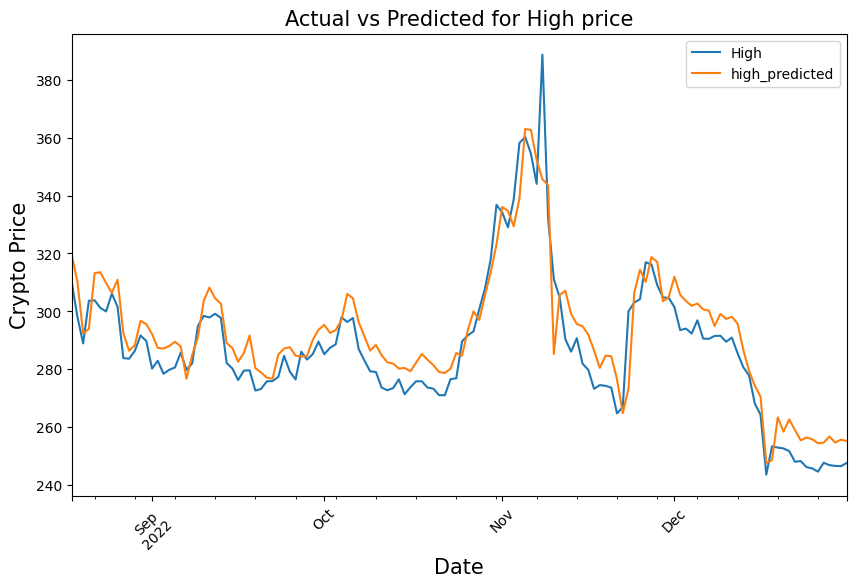

In [270]:
new_data[['High','high_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for High price',size=15)
plt.show()

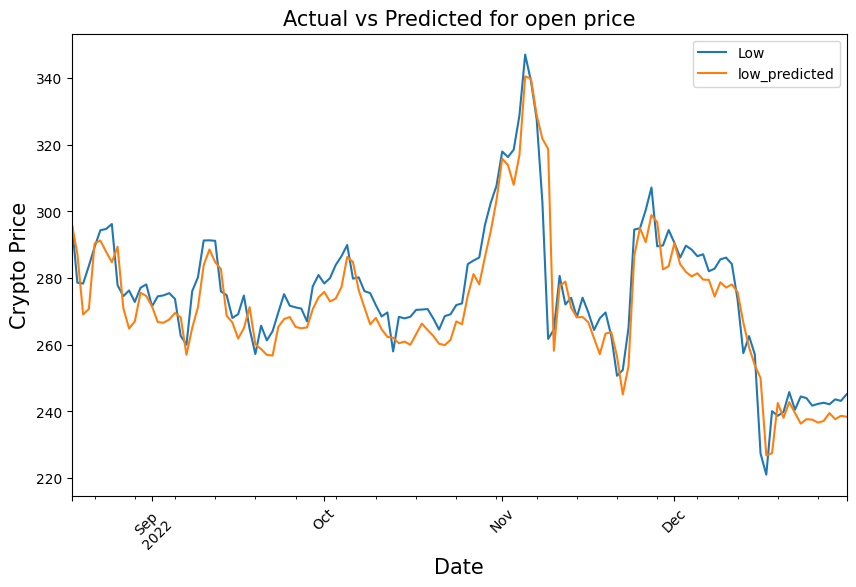

In [271]:
new_data[['Low', 'low_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

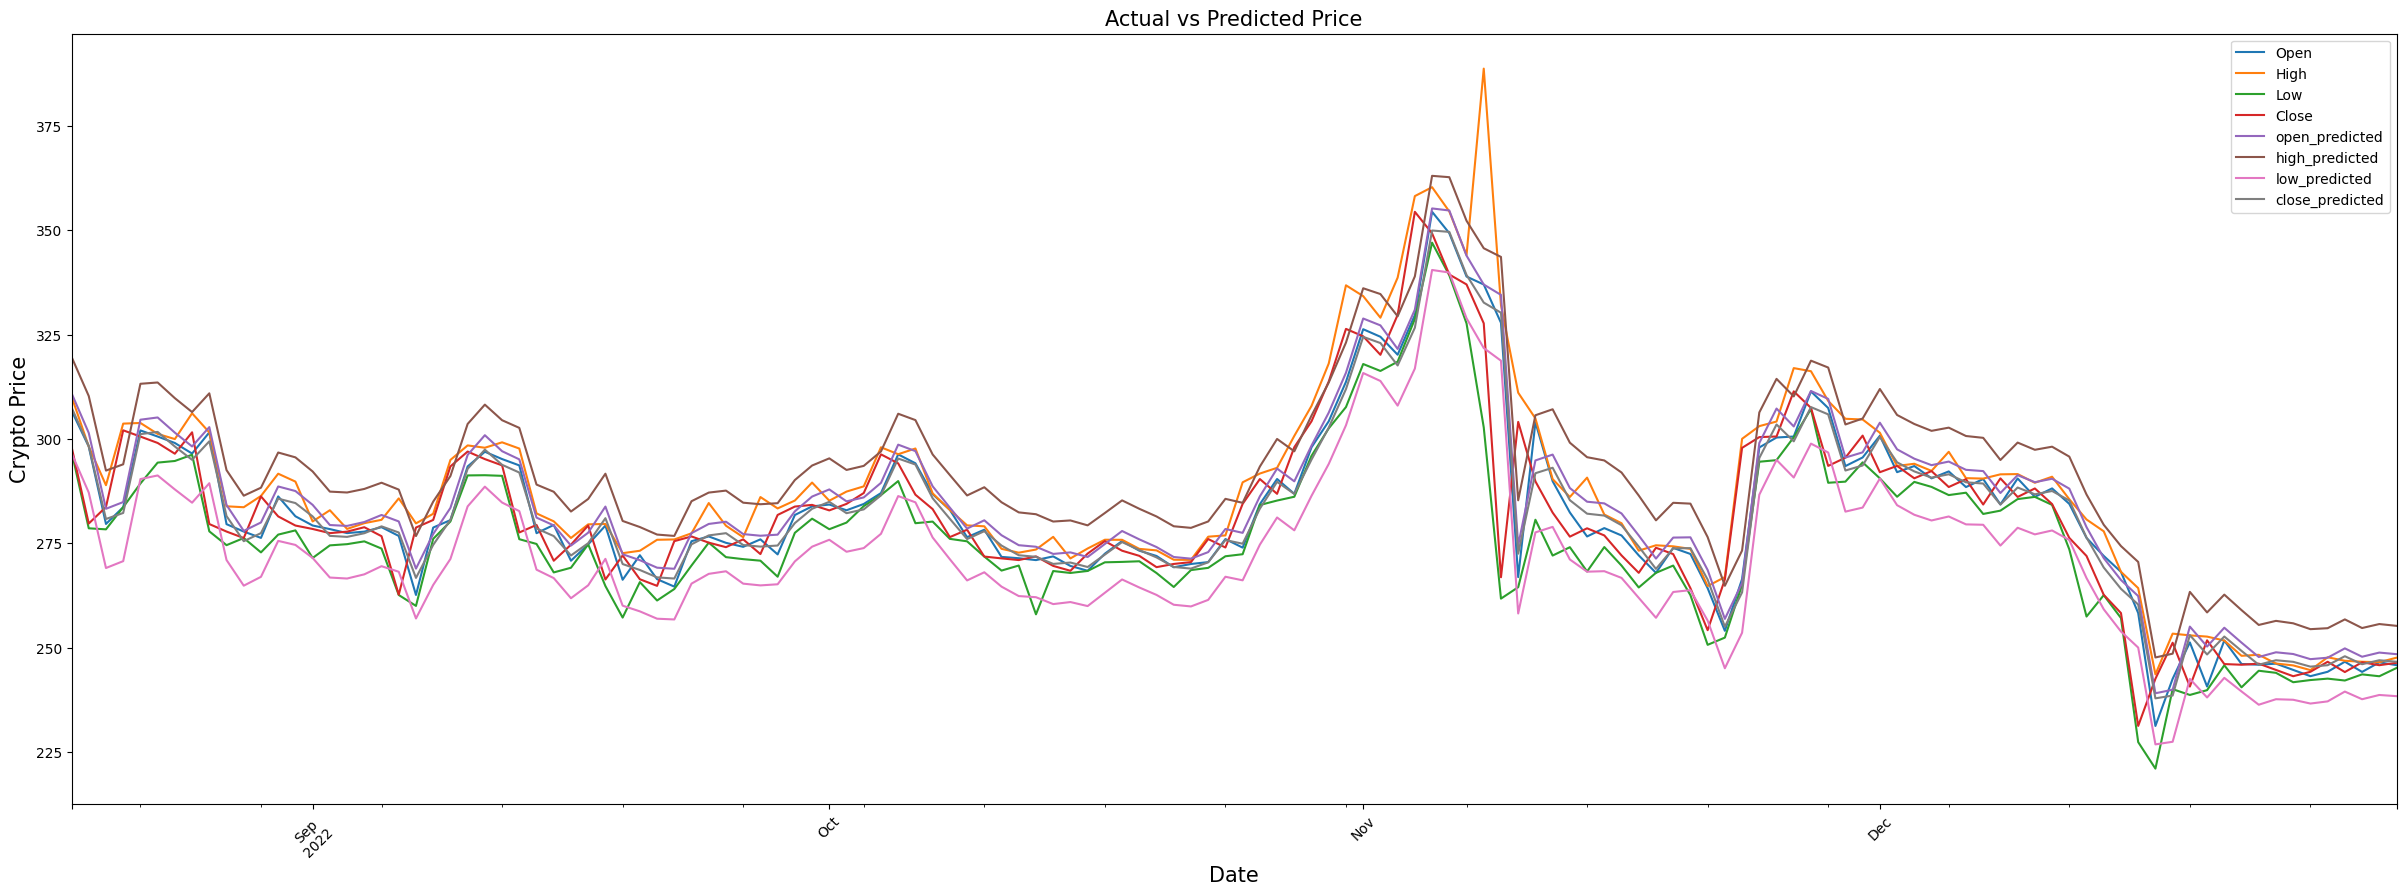

In [272]:
new_data[:].plot(figsize=(30,10))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Crypto Price',size=15)
plt.title('Actual vs Predicted Price',size=15)
plt.show()

In [273]:
new_data

,Open,High,Low,Close,open_predicted,high_predicted,low_predicted,close_predicted
Date,,,,,,,,
2022-08-18,306.80,310.19,297.03,298.14,310.966492,319.662079,296.585510,307.536926
2022-08-19,298.15,298.19,278.58,279.72,301.434052,310.272766,287.144653,298.343384
2022-08-20,279.62,288.91,278.33,283.69,283.255737,292.408203,269.067047,280.808594
2022-08-21,283.64,303.66,283.64,302.06,284.866180,293.914398,270.710846,282.254303
2022-08-22,302.03,303.82,289.31,300.56,304.599304,313.206024,290.376678,301.139557
...,...,...,...,...,...,...,...,...
2022-12-27,244.20,247.68,242.56,246.60,247.575211,254.644180,237.109283,245.775604
2022-12-28,246.61,246.84,242.11,244.14,249.809540,256.754883,239.460373,247.929260
2022-12-29,244.17,246.60,243.58,246.48,247.806686,254.685333,237.627060,246.013870


# Predicting upcoming Days



In [274]:
start_predict = new_data.index[-1]
end_predict = pd.to_datetime("today")
periode = (start_predict - end_predict).days - 1
periode

-245

In [275]:
# Creating a dataframe and adding N days to existing index

new_rows = pd.DataFrame(index=pd.date_range(start=start_predict,  end=end_predict, freq='D', inclusive='right'), columns=new_data.columns[:4])
new_pred_data = pd.concat([new_data.drop(columns=['open_predicted','high_predicted', 'low_predicted', 'close_predicted'], axis= 0), new_rows], axis=0)

In [276]:
new_rows

,Open,High,Low,Close
2023-01-01,NaN,NaN,NaN,NaN
2023-01-02,NaN,NaN,NaN,NaN
2023-01-03,NaN,NaN,NaN,NaN
2023-01-04,NaN,NaN,NaN,NaN
2023-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-08-27,NaN,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN,NaN
2023-08-29,NaN,NaN,NaN,NaN
2023-08-30,NaN,NaN,NaN,NaN


In [277]:
#Get Latest Price

latest_date_start = start_predict.strftime("%d-%m-%Y")

latest_date_end = end_predict.strftime("%d-%m-%Y")

latest_scraper = CmcScraper(crypto, latest_date_start, latest_date_end)
latest_price =  latest_scraper.get_dataframe()

In [278]:
latest_price['Open'] = latest_price['Open'].apply(lambda x:round(x,2))
latest_price['High'] = latest_price['High'].apply(lambda x:round(x,2))
latest_price['Low'] = latest_price['Low'].apply(lambda x:round(x,2))
latest_price['Close'] = latest_price['Close'].apply(lambda x:round(x,2))

In [279]:
latest_price = latest_price[::-1]
latest_price = latest_price.reset_index()

In [280]:
latest_price = latest_price[['Date','Open','High','Low','Close']] # Extracting required columns
latest_price['Date'] = pd.to_datetime(latest_price['Date'])
latest_price.set_index('Date', drop=True, inplace=True) # Setting date column as index

In [281]:
latest_price

,Open,High,Low,Close
Date,,,,
2022-12-31,245.79,247.58,245.11,246.35
2023-01-01,246.33,246.49,243.58,244.14
2023-01-02,244.15,247.72,241.69,245.54
2023-01-03,245.55,246.83,244.78,246.13
2023-01-04,246.14,260.52,245.70,259.12
...,...,...,...,...
2023-08-26,218.33,218.79,216.21,216.36
2023-08-27,216.37,219.54,216.08,218.36
2023-08-28,218.36,218.97,215.85,218.72


In [282]:
new_pred_data

,Open,High,Low,Close
2022-08-18,306.80,310.19,297.03,298.14
2022-08-19,298.15,298.19,278.58,279.72
2022-08-20,279.62,288.91,278.33,283.69
2022-08-21,283.64,303.66,283.64,302.06
2022-08-22,302.03,303.82,289.31,300.56
...,...,...,...,...
2023-08-27,NaN,NaN,NaN,NaN
2023-08-28,NaN,NaN,NaN,NaN
2023-08-29,NaN,NaN,NaN,NaN
2023-08-30,NaN,NaN,NaN,NaN


In [283]:
upcoming_prediction = pd.DataFrame(columns=['Open','High','Low','Close'], index=new_pred_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [284]:
test_seq[-1:]

array([[[0.3669231 , 0.35870819, 0.38195085, 0.35886645],
        [0.35854429, 0.35336458, 0.37355737, 0.35862769],
        [0.35827593, 0.35371498, 0.37986838, 0.35901568],
        [0.35866357, 0.35066357, 0.37907354, 0.35676232],
        [0.35641232, 0.35000657, 0.37549677, 0.35452388],
        [0.35419089, 0.34835677, 0.3763234 , 0.35610571],
        [0.35575633, 0.35285358, 0.37686389, 0.35968722],
        [0.35934938, 0.35162717, 0.37614854, 0.35601618],
        [0.3557116 , 0.35127677, 0.37848536, 0.35950814],
        [0.35912574, 0.35113077, 0.37777001, 0.35846354]]])

In [285]:
currenct_seq = test_seq[-1:]

for i in range(periode, 0):
  up_pred = model.predict(currenct_seq)
  upcoming_prediction.iloc[i] = up_pred
  currenct_seq = np.append(currenct_seq[0][1:],up_pred,axis=0)
  currenct_seq = currenct_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [286]:
upcoming_prediction[['Open','High','Low','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','High','Low','Close']])

In [287]:
upcoming_prediction[start_predict:end_predict]

,Open,High,Low,Close
2022-12-31,249.484282,256.282068,239.365925,247.623621
2023-01-01,250.447542,257.295242,240.216966,248.543717
2023-01-02,251.278590,258.210376,240.889605,249.337398
2023-01-03,252.177463,259.218141,241.592522,250.197422
2023-01-04,253.228196,260.386430,242.428921,251.202754
...,...,...,...,...
2023-08-27,297.317519,305.879045,283.339566,294.074743
2023-08-28,297.317639,305.879167,283.339660,294.074823
2023-08-29,297.317739,305.879269,283.339754,294.074942
2023-08-30,297.317839,305.879371,283.339866,294.075022


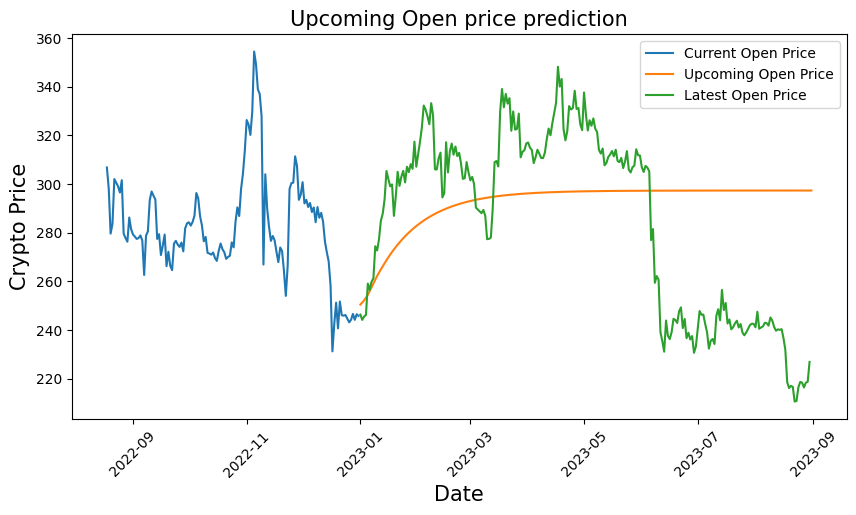

In [288]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Open'],label='Upcoming Open Price')
ax.plot(latest_price.loc['2023-01-01':,'Open'],label='Latest Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

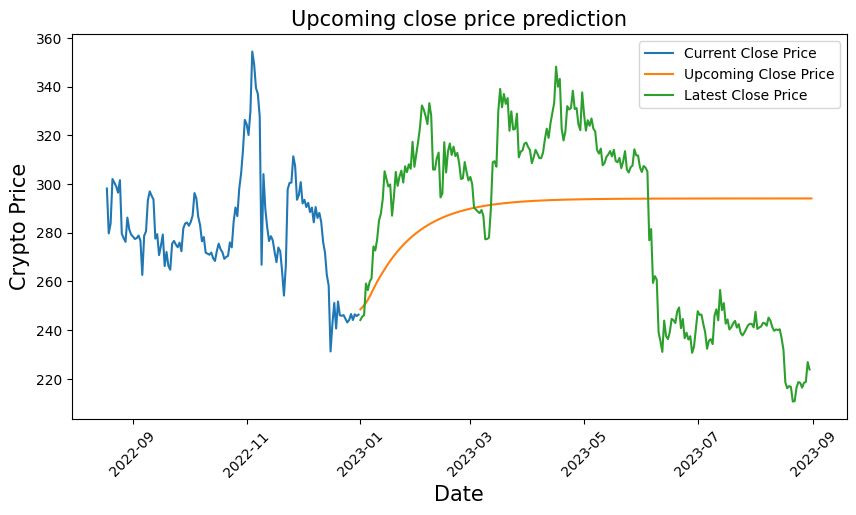

In [289]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Close'],label='Current Close Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Close'],label='Upcoming Close Price')
ax.plot(latest_price.loc['2023-01-01':,'Close'],label='Latest Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

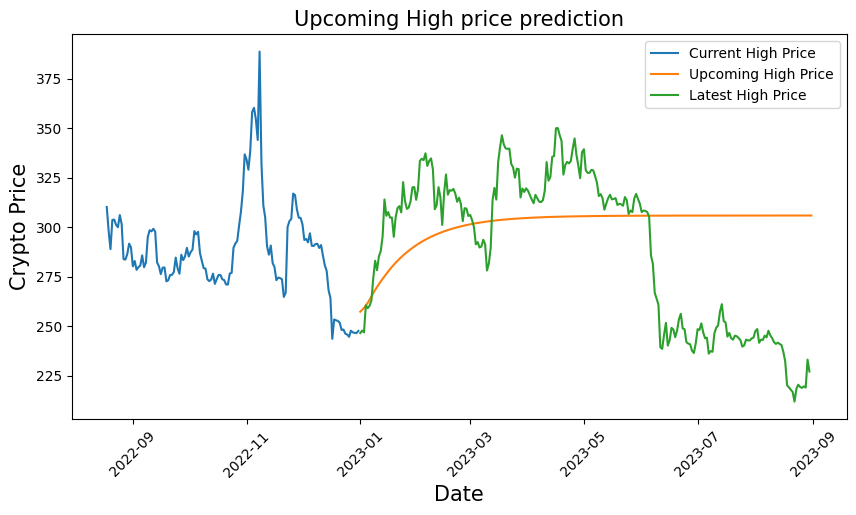

In [290]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'High'],label='Current High Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'High'],label='Upcoming High Price')
ax.plot(latest_price.loc['2023-01-01':,'High'],label='Latest High Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Crypto Price',size=15)
ax.set_title('Upcoming High price prediction',size=15)
ax.legend()
fig.show()

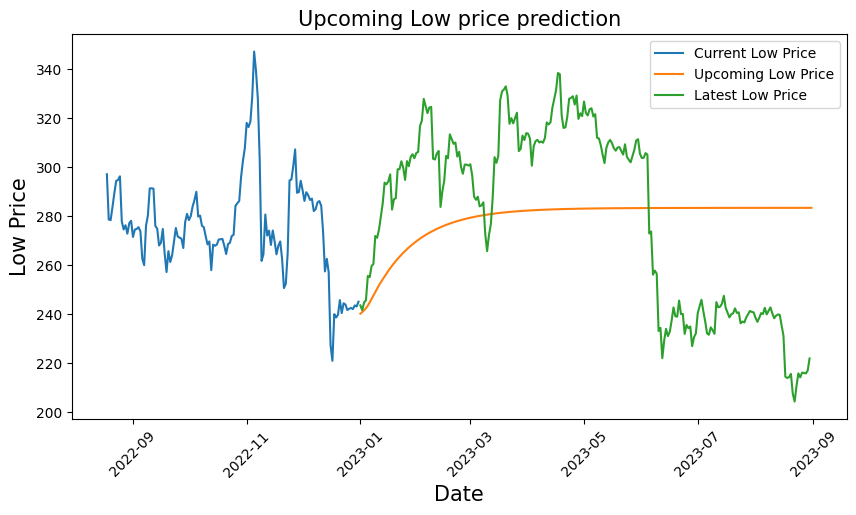

In [291]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(new_pred_data.loc['2022-01-01':,'Low'],label='Current Low Price')
ax.plot(upcoming_prediction.loc['2023-01-01':,'Low'],label='Upcoming Low Price')
ax.plot(latest_price.loc['2023-01-01':,'Low'],label='Latest Low Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Low Price',size=15)
ax.set_title('Upcoming Low price prediction',size=15)
ax.legend()
fig.show()

In [292]:
import zipfile
import os

def zip_folder(folder_path, output_path):
    with zipfile.ZipFile(output_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, folder_path)
                zipf.write(file_path, arcname)

In [293]:
folder_to_compress = f'/content/{crypto}_epoch_{epoch}_model'
output_zip_path = f'/content/{crypto}_epoch_{epoch}_model.zip'

zip_folder(folder_to_compress, output_zip_path)
print(f'Folder "{folder_to_compress}" compressed to "{output_zip_path}"')

Folder "/content/BNB_epoch_100_model" compressed to "/content/BNB_epoch_100_model.zip"
